In [0]:
import keras 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import join
import cv2
import pandas as pd
from keras.utils.np_utils import to_categorical
import os
import random
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import tensorflow
from sklearn.preprocessing import LabelEncoder

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
'''
https://jovianlin.io/cat-crossentropy-vs-sparse-cat-crossentropy/
https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621
'''

'\nhttps://jovianlin.io/cat-crossentropy-vs-sparse-cat-crossentropy/\nhttps://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621\n'

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Assigning path of the dataset 
#dir='/home/vishakraj/Desktop/ML Datasets/flowers/'
#dir=r'C:\Users\softloft\AppData\Local\Programs\Python\Python37\Scripts\Untitled Folder\flowers'
dir=r'gdrive/My Drive/flowers/train/'

In [0]:
folders = os.listdir(dir)
print(folders)

['tulip', 'rose', 'daisy', 'sunflower', 'dandelion']


(240, 320, 3)
<class 'numpy.ndarray'>
(300, 300, 3)


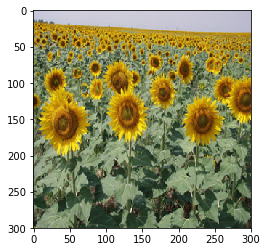

In [0]:
folder='sunflower/'
f="1022552036_67d33d5bd8_n.jpg"
img = cv2.imread(os.path.join(dir,folder,f))
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(RGB_img.shape)
print(type(RGB_img))
size=300,300
im = cv2.resize(RGB_img,size)
print(im.shape)
plt.imshow(im)
#plt.imshow(img)


In [0]:
size=(224, 224)
labels = []
images = []

for folder in folders:
    for file in os.listdir(os.path.join(dir,folder)):
        if file.endswith("jpg"):
            labels.append(str(folder))
            img = cv2.imread(os.path.join(dir,folder,file))
            RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(RGB_img,size)
            images.append(np.array(im))
        else:
            continue


In [0]:
le=LabelEncoder()
y=le.fit_transform(labels)
y=to_categorical(y,5)

In [0]:
y

In [0]:
x=np.array(images)
x=x/255

In [0]:
x.shape

In [0]:
y.shape

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,)

In [0]:
sys.getsizeof(x)
sys.getsizeof(y)

In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from matplotlib import pyplot as plt
import seaborn as sns
from keras.layers import Dropout, Flatten,Activation, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(224, 224, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 160, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(5, activation="softmax"))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)

In [0]:
data_generator = ImageDataGenerator(rescale=1. / 255,
                                    featurewise_center=False,samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=30,
                                    zoom_range = 0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True, 
                                    vertical_flip=False,
                                    validation_split=0.20,
                                    )


image_size = 224

train_generator = data_generator.flow_from_directory(r'gdrive/My Drive/flowers/train/',
        target_size=(image_size, image_size),
        class_mode='categorical',
        subset='training')

validation_generator = data_generator.flow_from_directory(r'gdrive/My Drive/flowers/train/',
        target_size=(image_size, image_size),
        class_mode='categorical',
        subset='validation')

print(train_generator.class_indices)
num_classes = len(train_generator.class_indices)


Found 3462 images belonging to 5 classes.
Found 861 images belonging to 5 classes.
{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


In [0]:
red_lr= ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=1,factor=0.001,mode='min')
check=ModelCheckpoint(filepath=r'gdrive/My Drive/Colab Notebooks/flowers/i_models12.hdf5', verbose=1, save_best_only = True)
epochs=50
History = model.fit_generator(train_generator,
                              epochs = epochs, validation_data = validation_generator,
                              verbose = 1, callbacks=[check, red_lr] ,shuffle=True)

#history=model.fit(x_train,y_train,batch_size=140,epochs=5,validation_data=(x_test, y_test),shuffle=True,callbacks=[check],)
#

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/50
  3/109 [..............................] - ETA: 26:42 - loss: 1.5943 - acc: 0.2188

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 85 could not be retrieved. It could be because a worker has died.
  UserWarning)


 15/109 [===>..........................] - ETA: 22:49 - loss: 1.5640 - acc: 0.2917

In [0]:
from keras.models import load_model
model_json = model.to_json()
with open(r"gdrive/My Drive/Colab Notebooks/flowers/model_78.json", "w") as json_file:
    json_file.write(model_json)

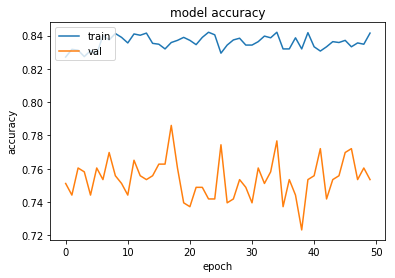

In [0]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

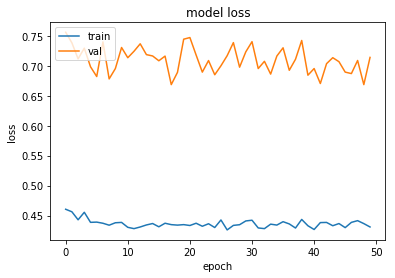

In [0]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [38]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np
#[[9.9328834e-05 2.3868597e-06 9.9158305e-01 6.5732786e-07 8.3146598e-03]]
def perc(results):

  class_label_percentage = []
  
  for imga in results:
    percentage = []
    tot=0
    for i in imga:
      tot = i+tot
    for i in imga:
      percentage.append(i/tot*100)
    
    class_label_percentage.append(percentage)
  
  return(class_label_percentage)

class_labels =['daisy', 'dandelion', 'rose', 'sunflower', 'tulip' ]

f = Path(r"gdrive/My Drive/Colab Notebooks/flowers/model_78.json")
model_structure = f.read_text()

model = model_from_json(model_structure)
model.load_weights(r"gdrive/My Drive/Colab Notebooks/flowers/loss: 0.4346 - acc: 0.8359 - val_loss: 0.6685 - val_acc: 0.7860.h5")
img = image.load_img(r"gdrive/My Drive/Colab Notebooks/flowers/index.jpg", target_size=(224, 224))

image_to_test = image.img_to_array(img)/255

list_of_images = np.expand_dims(image_to_test, axis=0)

results = model.predict_proba(list_of_images)
print(results)

single_result = results[0]

class_label_percentage = perc(results)
print(class_label_percentage)
indd = 0

for i in (class_label_percentage):
  print("\nImage:",indd,"\n")
  for ii in range(0,5):
    print(class_labels[ii]," : ",i[ii],)
  indd += 1
  most_likely_class_index = int(np.argmax(i))
  class_likelihood = i[most_likely_class_index]
  class_label = class_labels[most_likely_class_index]
  print("This is image is a {} - Likelihood: {:2f}".format(class_label, class_likelihood))



[[9.9328834e-05 2.3868597e-06 9.9158305e-01 6.5732786e-07 8.3146598e-03]]
[[0.00993288258809592, 0.00023868595093871038, 99.15829678507461, 6.573278057072982e-05, 0.831465913605791]]

Image: 0 

daisy  :  0.00993288258809592
dandelion  :  0.00023868595093871038
rose  :  99.15829678507461
sunflower  :  6.573278057072982e-05
tulip  :  0.831465913605791
This is image is a rose - Likelihood: 0.991583


In [0]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

class_labels =['tulip', 'rose', 'daisy', 'sunflower', 'dandelion']

def perc(results):

  class_label_percentage = []
  
  for imga in results:
    percentage = []
    tot=0
    for i in imga:
      tot = i+tot
    for i in imga:
      percentage.append(i/tot*100)
    
    class_label_percentage.append(percentage)
  
  return(class_label_percentage)

f = Path(r"gdrive/My Drive/Colab Notebooks/flowers/model_78.json")
model_structure = f.read_text()

model = model_from_json(model_structure)

model.load_weights(r"gdrive/My Drive/Colab Notebooks/flowers/loss: 0.4346 - acc: 0.8359 - val_loss: 0.6685 - val_acc: 0.7860.h5")

dir=r'gdrive/My Drive/flowers/train/'
size=(224, 224)
list_of_images = []

for folder in folders:
    for file in os.listdir(os.path.join(dir,folder)):
        if file.endswith("jpg"):
            img = cv2.imread(os.path.join(dir,folder,file))
            RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(RGB_img,size)
            list_of_images.append(np.array(im))
        else:
            continue

results = model.predict(list_of_images)
print(results)
class_label_percentage = perc(results)
indd = 0
for i in class_label_percentage:
  print("\nImage:",indd,"\n")
  for ii in range(0,5):
    print(class_labels[ii]," : ",i[ii],)
  indd += 1

  single_result = results[i]
  most_likely_class_index = int(np.argmax(i))
  class_likelihood = i[most_likely_class_index]
  class_label = class_labels[most_likely_class_index]
  print("This is image is a {} - Likelihood: {:2f}".format(class_label, class_likelihood))


In [0]:
import tensorflow as tf

converter = tf.contrib.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)


In [0]:
interpreter = tf.contrib.lite.Interpreter(model_path=r"gdrive/My Drive/Colab Notebooks/flowers/model.tflite")
interpreter.allocate_tensors()

print("== Input details ==")
print("name:", interpreter.get_input_details()[0]['name'])
print("shape:", interpreter.get_input_details()[0]['shape'])
print("type:", interpreter.get_input_details()[0]['dtype'])

print("\n== Output details ==")
print("name:", interpreter.get_output_details()[0]['name'])
print("shape:", interpreter.get_output_details()[0]['shape'])
print("type:", interpreter.get_output_details()[0]['dtype'])

print("\nDUMP INPUT")
print(interpreter.get_input_details()[0])
print("\nDUMP OUTPUT")
print(interpreter.get_output_details()[0])

== Input details ==
name: conv2d_1_input
shape: [  1 224 224   3]
type: <class 'numpy.float32'>

== Output details ==
name: dense_2/Softmax
shape: [1 5]
type: <class 'numpy.float32'>

DUMP INPUT
{'name': 'conv2d_1_input', 'index': 3, 'shape': array([  1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}

DUMP OUTPUT
{'name': 'dense_2/Softmax', 'index': 18, 'shape': array([1, 5], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}


In [0]:
example_img_for_tflite = image.load_img(r"gdrive/My Drive/Colab Notebooks/flowers/ii1.jpg", target_size=(224, 224))

example_img_for_tflite = image.img_to_array(example_img_for_tflite)/255

example_img_for_tflite = np.expand_dims(example_img_for_tflite,0).astype(np.float32)
print("Input data shape:", example_img_for_tflite.shape)
print("Input data type:", example_img_for_tflite.dtype)

input_details = interpreter.get_input_details()
interpreter.set_tensor(input_details[0]['index'], example_img_for_tflite)

interpreter.invoke()

output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])
print("\n\nPrediction results:", output_data)
print("Predicted value:", np.argmax(output_data))

Input data shape: (1, 224, 224, 3)
Input data type: float32


Prediction results: [[3.7248512e-06 7.7217635e-05 2.5580721e-07 9.9991882e-01 8.5990148e-09]]
Predicted value: 3
